<a href="https://colab.research.google.com/github/camigenius/university-workshop/blob/master/Trabajo_Final_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#repositorio=https://archive.ics.uci.edu/ml/datasets/student+performance

url="https://raw.githubusercontent.com/camigenius/university-workshop/master/student-por.csv"
df=pd.read_csv(url,sep=";")

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# Cambio los nombres de la variables para entender mejor los Datos
df.columns = ['Colegio', 'Genero', 'Edad', 'Ubicacion', 'Tamano_Familia', 'Padres_separados', 'Nivel_Edu_Madre', 'Nivel_Edu_Padre',
       'Trabajo_Madre', 'Trabajo_Padre', 'RazonEleccionCol', 'Vigilacia_Pad_Mad', 'Tiempo_viaje_Escuela', 'Tiempo_Studio_Sem',
       'Mat_Reprobadas', 'Extra_Clases', 'Extra_Clases_Fam', 'Clases_Extra_Port', 'Activ_ExtraEscol', 'Guarderia',
       'Estudios_Sup', 'Internet_Casa', 'Relacion_Sentim', 'Relaciones_fam', 'Tiempo_Libre', 'Salir_Amigos', 'Consumo_Alcohol_Lab',
       'Consumo_Alcohol-Finde', 'Estado_Salud', 'Ausencias', 'Nota_Periodo1', 'Nota_Periodo2', 'Nota_Final']

In [ ]:
df.head(2)

,Colegio,Genero,Edad,Ubicacion,Tamano_Familia,Padres_separados,Nivel_Edu_Madre,Nivel_Edu_Padre,Trabajo_Madre,Trabajo_Padre,...,Relaciones_fam,Tiempo_Libre,Salir_Amigos,Consumo_Alcohol_Lab,Consumo_Alcohol-Finde,Estado_Salud,Ausencias,Nota_Periodo1,Nota_Periodo2,Nota_Final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


In [ ]:
# No hay datos faltantes
df.isnull().sum()

Colegio                  0
Genero                   0
Edad                     0
Ubicacion                0
Tamano_Familia           0
Padres_separados         0
Nivel_Edu_Madre          0
Nivel_Edu_Padre          0
Trabajo_Madre            0
Trabajo_Padre            0
RazonEleccionCol         0
Vigilacia_Pad_Mad        0
Tiempo_viaje_Escuela     0
Tiempo_Studio_Sem        0
Mat_Reprobadas           0
Extra_Clases             0
Extra_Clases_Fam         0
Clases_Extra_Port        0
Activ_ExtraEscol         0
Guarderia                0
Estudios_Sup             0
Internet_Casa            0
Relacion_Sentim          0
Relaciones_fam           0
Tiempo_Libre             0
Salir_Amigos             0
Consumo_Alcohol_Lab      0
Consumo_Alcohol-Finde    0
Estado_Salud             0
Ausencias                0
Nota_Periodo1            0
Nota_Periodo2            0
Nota_Final               0
dtype: int64

In [ ]:
# Se identifican los tipos de Datos
df.dtypes

Colegio                  object
Genero                   object
Edad                      int64
Ubicacion                object
Tamano_Familia           object
Padres_separados         object
Nivel_Edu_Madre           int64
Nivel_Edu_Padre           int64
Trabajo_Madre            object
Trabajo_Padre            object
RazonEleccionCol         object
Vigilacia_Pad_Mad        object
Tiempo_viaje_Escuela      int64
Tiempo_Studio_Sem         int64
Mat_Reprobadas            int64
Extra_Clases             object
Extra_Clases_Fam         object
Clases_Extra_Port        object
Activ_ExtraEscol         object
Guarderia                object
Estudios_Sup             object
Internet_Casa            object
Relacion_Sentim          object
Relaciones_fam            int64
Tiempo_Libre              int64
Salir_Amigos              int64
Consumo_Alcohol_Lab       int64
Consumo_Alcohol-Finde     int64
Estado_Salud              int64
Ausencias                 int64
Nota_Periodo1             int64
Nota_Per

In [ ]:
# Creo una función para convertir la variable a Predecir en Binaria
# 1 Reprobó
# 0 Aprobó
def reprobo(x):
  #y = None  
  if x <10:
    y = 1
  else:
    y = 0
  return y    

In [ ]:
# Se Testea la función
print(reprobo(7))
print(reprobo(15))

1
0


In [ ]:
# Se aplica la función al dataframe  con el método apply
df['Reprobo']=df.Nota_Final.apply(func=reprobo)

In [ ]:
# queda lista la transformación
df.head()

,Colegio,Genero,Edad,Ubicacion,Tamano_Familia,Padres_separados,Nivel_Edu_Madre,Nivel_Edu_Padre,Trabajo_Madre,Trabajo_Padre,...,Tiempo_Libre,Salir_Amigos,Consumo_Alcohol_Lab,Consumo_Alcohol-Finde,Estado_Salud,Ausencias,Nota_Periodo1,Nota_Periodo2,Nota_Final,Reprobo
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0


In [ ]:
# Se cuentas cuantos alumnos aprobaron o reprobaron
df['Reprobo'].value_counts()

0    549
1    100
Name: Reprobo, dtype: int64

In [ ]:
df.dtypes

Colegio                  object
Genero                   object
Edad                      int64
Ubicacion                object
Tamano_Familia           object
Padres_separados         object
Nivel_Edu_Madre           int64
Nivel_Edu_Padre           int64
Trabajo_Madre            object
Trabajo_Padre            object
RazonEleccionCol         object
Vigilacia_Pad_Mad        object
Tiempo_viaje_Escuela      int64
Tiempo_Studio_Sem         int64
Mat_Reprobadas            int64
Extra_Clases             object
Extra_Clases_Fam         object
Clases_Extra_Port        object
Activ_ExtraEscol         object
Guarderia                object
Estudios_Sup             object
Internet_Casa            object
Relacion_Sentim          object
Relaciones_fam            int64
Tiempo_Libre              int64
Salir_Amigos              int64
Consumo_Alcohol_Lab       int64
Consumo_Alcohol-Finde     int64
Estado_Salud              int64
Ausencias                 int64
Nota_Periodo1             int64
Nota_Per

In [ ]:
df.columns

Index(['Colegio', 'Genero', 'Edad', 'Ubicacion', 'Tamano_Familia',
       'Padres_separados', 'Nivel_Edu_Madre', 'Nivel_Edu_Padre',
       'Trabajo_Madre', 'Trabajo_Padre', 'RazonEleccionCol',
       'Vigilacia_Pad_Mad', 'Tiempo_viaje_Escuela', 'Tiempo_Studio_Sem',
       'Mat_Reprobadas', 'Extra_Clases', 'Extra_Clases_Fam',
       'Clases_Extra_Port', 'Activ_ExtraEscol', 'Guarderia', 'Estudios_Sup',
       'Internet_Casa', 'Relacion_Sentim', 'Relaciones_fam', 'Tiempo_Libre',
       'Salir_Amigos', 'Consumo_Alcohol_Lab', 'Consumo_Alcohol-Finde',
       'Estado_Salud', 'Ausencias', 'Nota_Periodo1', 'Nota_Periodo2',
       'Nota_Final', 'Reprobo'],
      dtype='object')

In [ ]:
# Se separan las variables categóricas para posterior análisis
categorical=['Colegio', 'Genero', 'Ubicacion', 'Tamano_Familia','Padres_separados',
       'Trabajo_Madre', 'Trabajo_Padre', 'RazonEleccionCol',
       'Vigilacia_Pad_Mad', 'Extra_Clases', 'Extra_Clases_Fam',
       'Clases_Extra_Port', 'Activ_ExtraEscol', 'Guarderia', 'Estudios_Sup',
       'Internet_Casa', 'Relacion_Sentim']

In [ ]:
len(categorical)

17

In [ ]:
# Se separan las variables Numéricas para posterior análisis o manipulación
numerical=['Edad','Nivel_Edu_Madre', 'Nivel_Edu_Padre',
       'Tiempo_viaje_Escuela', 'Tiempo_Studio_Sem',
       'Mat_Reprobadas','Relaciones_fam', 'Tiempo_Libre',
       'Salir_Amigos', 'Consumo_Alcohol_Lab', 'Consumo_Alcohol-Finde',
       'Estado_Salud', 'Ausencias', 'Nota_Periodo1', 'Nota_Periodo2',
       'Nota_Final', 'Reprobo']

In [ ]:
#model=LogisticRegression(solver='liblinear',random_state=1)

In [ ]:
df[categorical].nunique()

Colegio              2
Genero               2
Ubicacion            2
Tamano_Familia       2
Padres_separados     2
Trabajo_Madre        5
Trabajo_Padre        5
RazonEleccionCol     4
Vigilacia_Pad_Mad    3
Extra_Clases         2
Extra_Clases_Fam     2
Clases_Extra_Port    2
Activ_ExtraEscol     2
Guarderia            2
Estudios_Sup         2
Internet_Casa        2
Relacion_Sentim      2
dtype: int64

In [ ]:
global_mean = df.Reprobo.mean()
global_mean

0.15408320493066255

In [ ]:
# Porcentaje de las mujeres que Reprueban la materia Portugues
mujeres=df[df['Genero']=='F'].Reprobo.mean()
round(mujeres,4)

0.1305

In [ ]:
# Porcentaje de hombres que Reprueba la materia Portugues
hombres=df[df['Genero']=='M'].Reprobo.mean()
round(hombres,4)

0.188

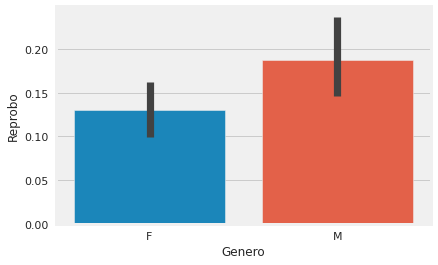

In [ ]:
sns.barplot(data=df,x='Genero',y='Reprobo')

In [ ]:
# Porcentaje de Alumnos de manera Global que aprobaron la materia 
global_mean = df.Reprobo.mean()
round(global_mean,4)

0.1541

In [ ]:
#risk = group rate / global rate
#global_mean = df.Reprobo.mean()
df_group = df.groupby(by='Genero').Reprobo.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group
# bajo Riesgo en ambos Generos
# Es decir que pasar o no la materia no depende del Género
# la difrencia entre medias del Global respecto a cada uno de los Generos
# y el conciente entre la media por Género y la Media Global

,mean,diff,risk
Genero,,,
F,0.130548,-0.023535,0.847258
M,0.187970,0.033887,1.219925


In [ ]:
# Con un ciclo se repite el procedimiento para cada una de las variables
from IPython.display import display

for col in categorical:
  df_group=df.groupby(by=col).Reprobo.agg(['mean'])
  df_group['diff']=df_group['mean']-global_mean
  df_group['risk']=df_group['mean']/global_mean
  display(df_group)

  # Diferencias Notorias
  # Colegio (Sacar una Gráfica)
  # Género (No tanta)
  # Ubicación 
  # Trabajo Madre en la casa(at_home)
  # Vigilancia Padre Madre( más cuando es otro)
  # Extra_Clases
  # Clases_Extra_Port(curiosamente clases extra de portugues)
  # Es muy notorio cuando no tienen educacón superior (pierden la materia)
  

,mean,diff,risk
Colegio,,,
GP,0.075650,-0.078433,0.490969
MS,0.300885,0.146802,1.952743


,mean,diff,risk
Genero,,,
F,0.130548,-0.023535,0.847258
M,0.187970,0.033887,1.219925


,mean,diff,risk
Ubicacion,,,
R,0.223350,0.069267,1.449543
U,0.123894,-0.030189,0.804071


,mean,diff,risk
Tamano_Familia,,,
GT3,0.166302,0.012219,1.07930
LE3,0.125000,-0.029083,0.81125


,mean,diff,risk
Padres_separados,,,
A,0.150000,-0.004083,0.973500
T,0.154657,0.000574,1.003726


,mean,diff,risk
Trabajo_Madre,,,
at_home,0.214815,0.060732,1.394148
health,0.125000,-0.029083,0.811250
other,0.162791,0.008707,1.056512
services,0.139706,-0.014377,0.906691
teacher,0.055556,-0.098528,0.360556


,mean,diff,risk
Trabajo_Padre,,,
at_home,0.166667,0.012583,1.081667
health,0.130435,-0.023648,0.846522
other,0.147139,-0.006944,0.954932
services,0.182320,0.028237,1.183260
teacher,0.083333,-0.070750,0.540833


,mean,diff,risk
RazonEleccionCol,,,
course,0.192982,0.038899,1.252456
home,0.114094,-0.039989,0.740470
other,0.250000,0.095917,1.622500
reputation,0.069930,-0.084153,0.453846


,mean,diff,risk
Vigilacia_Pad_Mad,,,
father,0.104575,-0.049508,0.678693
mother,0.164835,0.010752,1.069780
other,0.219512,0.065429,1.424634


,mean,diff,risk
Extra_Clases,,,
no,0.158348,0.004264,1.027676
yes,0.117647,-0.036436,0.763529


,mean,diff,risk
Extra_Clases_Fam,,,
no,0.171315,0.017232,1.111833
yes,0.143216,-0.010867,0.929472


,mean,diff,risk
Clases_Extra_Port,,,
no,0.149180,-0.004903,0.968180
yes,0.230769,0.076686,1.497692


,mean,diff,risk
Activ_ExtraEscol,,,
no,0.170659,0.016575,1.107575
yes,0.136508,-0.017575,0.885937


,mean,diff,risk
Guarderia,,,
no,0.148438,-0.005646,0.963359
yes,0.155470,0.001387,1.009002


,mean,diff,risk
Estudios_Sup,,,
no,0.478261,0.324178,3.103913
yes,0.115517,-0.038566,0.749707


,mean,diff,risk
Internet_Casa,,,
no,0.211921,0.057837,1.375364
yes,0.136546,-0.017537,0.886185


,mean,diff,risk
Relacion_Sentim,,,
no,0.131707,-0.022376,0.854780
yes,0.192469,0.038385,1.249121


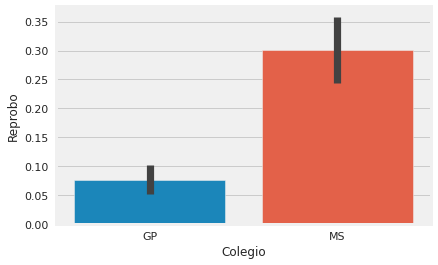

In [ ]:
sns.barplot(data=df,x='Colegio',y='Reprobo')

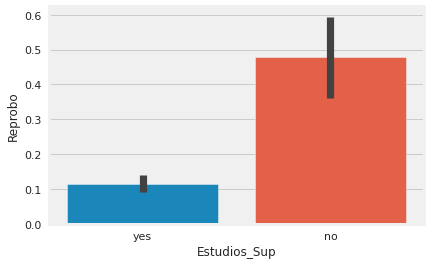

In [ ]:
sns.barplot(data=df,x='Estudios_Sup',y='Reprobo')


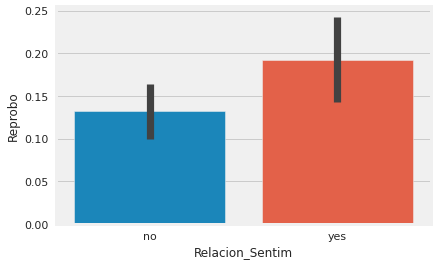

In [ ]:
sns.barplot(data=df,x='Relacion_Sentim',y='Reprobo')

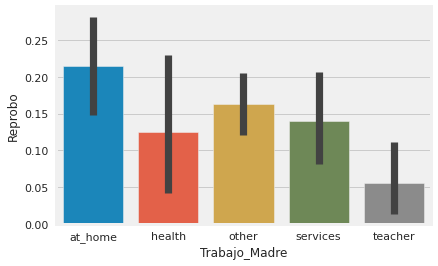

In [ ]:
sns.barplot(data=df,x='Trabajo_Madre',y='Reprobo')

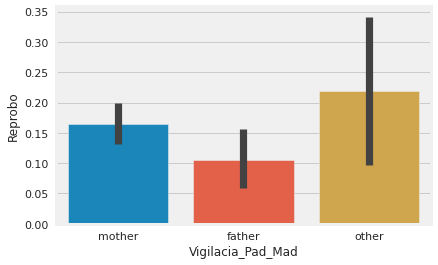

In [ ]:
sns.barplot(data=df,x='Vigilacia_Pad_Mad',y='Reprobo')

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def calculate_mi(series):
  return mutual_info_score(series,df.Reprobo)

# Diferencia entre distribución de Probabilidades

In [ ]:
df_mi=df[categorical].apply(calculate_mi)
df_mi=df_mi.sort_values(ascending=False).to_frame(name='MI')# se hace ordenacion de los valores 
df_mi

,MI
Colegio,0.042062
Estudios_Sup,0.036287
RazonEleccionCol,0.014590
Trabajo_Madre,0.008474
Ubicacion,0.007609
Vigilacia_Pad_Mad,0.003695
Internet_Casa,0.003664
Relacion_Sentim,0.003221
Genero,0.003019
Trabajo_Padre,0.002281


In [ ]:
# Si es negativo a medida que crece la variable es MENOR el Riesgo de Perder la materia
# Si es Positivo a medida que crece la variable es MAYOR el Riesgo de Perder la materia
df[numerical].corrwith(df.Reprobo)

Edad                     0.110722
Nivel_Edu_Madre         -0.144803
Nivel_Edu_Padre         -0.146249
Tiempo_viaje_Escuela     0.057869
Tiempo_Studio_Sem       -0.165111
Mat_Reprobadas           0.380237
Relaciones_fam          -0.044987
Tiempo_Libre             0.093349
Salir_Amigos             0.067241
Consumo_Alcohol_Lab      0.123627
Consumo_Alcohol-Finde    0.116249
Estado_Salud             0.009979
Ausencias                0.087483
Nota_Periodo1           -0.563070
Nota_Periodo2           -0.592251
Nota_Final              -0.663157
Reprobo                  1.000000
dtype: float64

In [ ]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import OneHotCategoricalEncoder
from feature_engine.encoding import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(top_categories=None, variables=['Colegio', 'Genero', 'Ubicacion', 'Tamano_Familia','Padres_separados',
       'Trabajo_Madre', 'Trabajo_Padre', 'RazonEleccionCol',
       'Vigilacia_Pad_Mad', 'Extra_Clases', 'Extra_Clases_Fam',
       'Clases_Extra_Port', 'Activ_ExtraEscol', 'Guarderia', 'Estudios_Sup',
       'Internet_Casa', 'Relacion_Sentim'])

In [ ]:
encoder.fit(df)

OneHotEncoder(drop_last=False, drop_last_binary=False, ignore_format=False,
              top_categories=None,
              variables=['Colegio', 'Genero', 'Ubicacion', 'Tamano_Familia',
                         'Padres_separados', 'Trabajo_Madre', 'Trabajo_Padre',
                         'RazonEleccionCol', 'Vigilacia_Pad_Mad',
                         'Extra_Clases', 'Extra_Clases_Fam',
                         'Clases_Extra_Port', 'Activ_ExtraEscol', 'Guarderia',
                         'Estudios_Sup', 'Internet_Casa', 'Relacion_Sentim'])

In [ ]:
df_cod=encoder.transform(df)

In [ ]:
df_cod.head()

,Edad,Nivel_Edu_Madre,Nivel_Edu_Padre,Tiempo_viaje_Escuela,Tiempo_Studio_Sem,Mat_Reprobadas,Relaciones_fam,Tiempo_Libre,Salir_Amigos,Consumo_Alcohol_Lab,...,Activ_ExtraEscol_no,Activ_ExtraEscol_yes,Guarderia_yes,Guarderia_no,Estudios_Sup_yes,Estudios_Sup_no,Internet_Casa_no,Internet_Casa_yes,Relacion_Sentim_no,Relacion_Sentim_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,1,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,1,0,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,1,0,1,0,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
df_cod.head().T

,0,1,2,3,4
Edad,18,17,15,15,16
Nivel_Edu_Madre,4,1,1,4,3
Nivel_Edu_Padre,4,1,1,2,3
Tiempo_viaje_Escuela,2,1,1,1,1
Tiempo_Studio_Sem,2,2,2,3,2
Mat_Reprobadas,0,0,0,0,0
Relaciones_fam,4,5,4,3,4
Tiempo_Libre,3,3,3,2,3
Salir_Amigos,4,3,2,2,2
Consumo_Alcohol_Lab,1,1,2,1,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Se separa el set de datos en entrenamiento y prueba
# Se elimina del Data set la variable predictora , la original , y la que se creo binaria, para predecirla
df_train,df_test=train_test_split(df_cod,test_size=0.2,random_state=1)
y_train=df_train.Reprobo.values
y_test=df_test.Reprobo.values
del df_train['Nota_Final']
del df_train['Reprobo']
del df_test['Nota_Final']
del df_test['Reprobo']

In [ ]:
df_train.shape

(519, 58)

In [ ]:
y_train.shape

(519,)

In [ ]:
df_test.shape

(130, 58)

In [ ]:
y_test.shape

(130,)

In [ ]:
#model=LogisticRegression(solver='liblinear',random_state=1)
model=LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.fit(df_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(df_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[102,   4],
       [ 11,  13]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

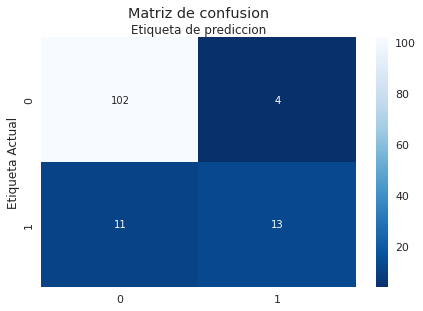

In [ ]:
import numpy as np


class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [ ]:
print('Accuracy=Exactitud',metrics.accuracy_score(y_test,y_pred))

Accuracy=Exactitud 0.8846153846153846


In [ ]:
# calculo detallado
Accuracy=115/130
Accuracy

0.8846153846153846

In [ ]:
precision_1=13/17
precision_1

0.7647058823529411

In [ ]:
precision_0=102/113
precision_0

0.9026548672566371

In [ ]:
recall_0=102/106
recall_0

0.9622641509433962

In [ ]:
recall_1=13/24
recall_1

0.5416666666666666

In [ ]:
Metricas=metrics.classification_report(y_test,y_pred)
print(Metricas)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       106
           1       0.76      0.54      0.63        24

    accuracy                           0.88       130
   macro avg       0.83      0.75      0.78       130
weighted avg       0.88      0.88      0.88       130



In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [ ]:
df_train,df_test=train_test_split(df_cod,test_size=0.2,random_state=1)
y_train=df_train.Nota_Final.values
y_test=df_test.Nota_Final.values
del df_train['Nota_Final']
del df_train['Reprobo']
del df_test['Nota_Final']
del df_test['Reprobo']

In [ ]:
reg_lineal = LinearRegression()
reg_lineal

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [ ]:
reg_lineal.fit(df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [ ]:
y_pred = reg_lineal.predict(df_test)
y_pred[1:10]

array([10.78320312,  8.64257812,  7.59570312, 11.48681641, 10.60888672,
       14.53222656, 12.81494141, 15.32519531, 14.21533203])

In [ ]:
len(y_pred)

130

In [ ]:
R_square=r2_score(y_test, y_pred)
RMSE=mean_squared_error(y_test,y_pred,squared=False)
MAE=mean_absolute_error(y_test, y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)

In [ ]:
print(round(R_square,3))
print(round(RMSE,3))
print(round(MAE,3))
print(round(MAPE,3))

0.857
1.385
0.807
387281826429715.8


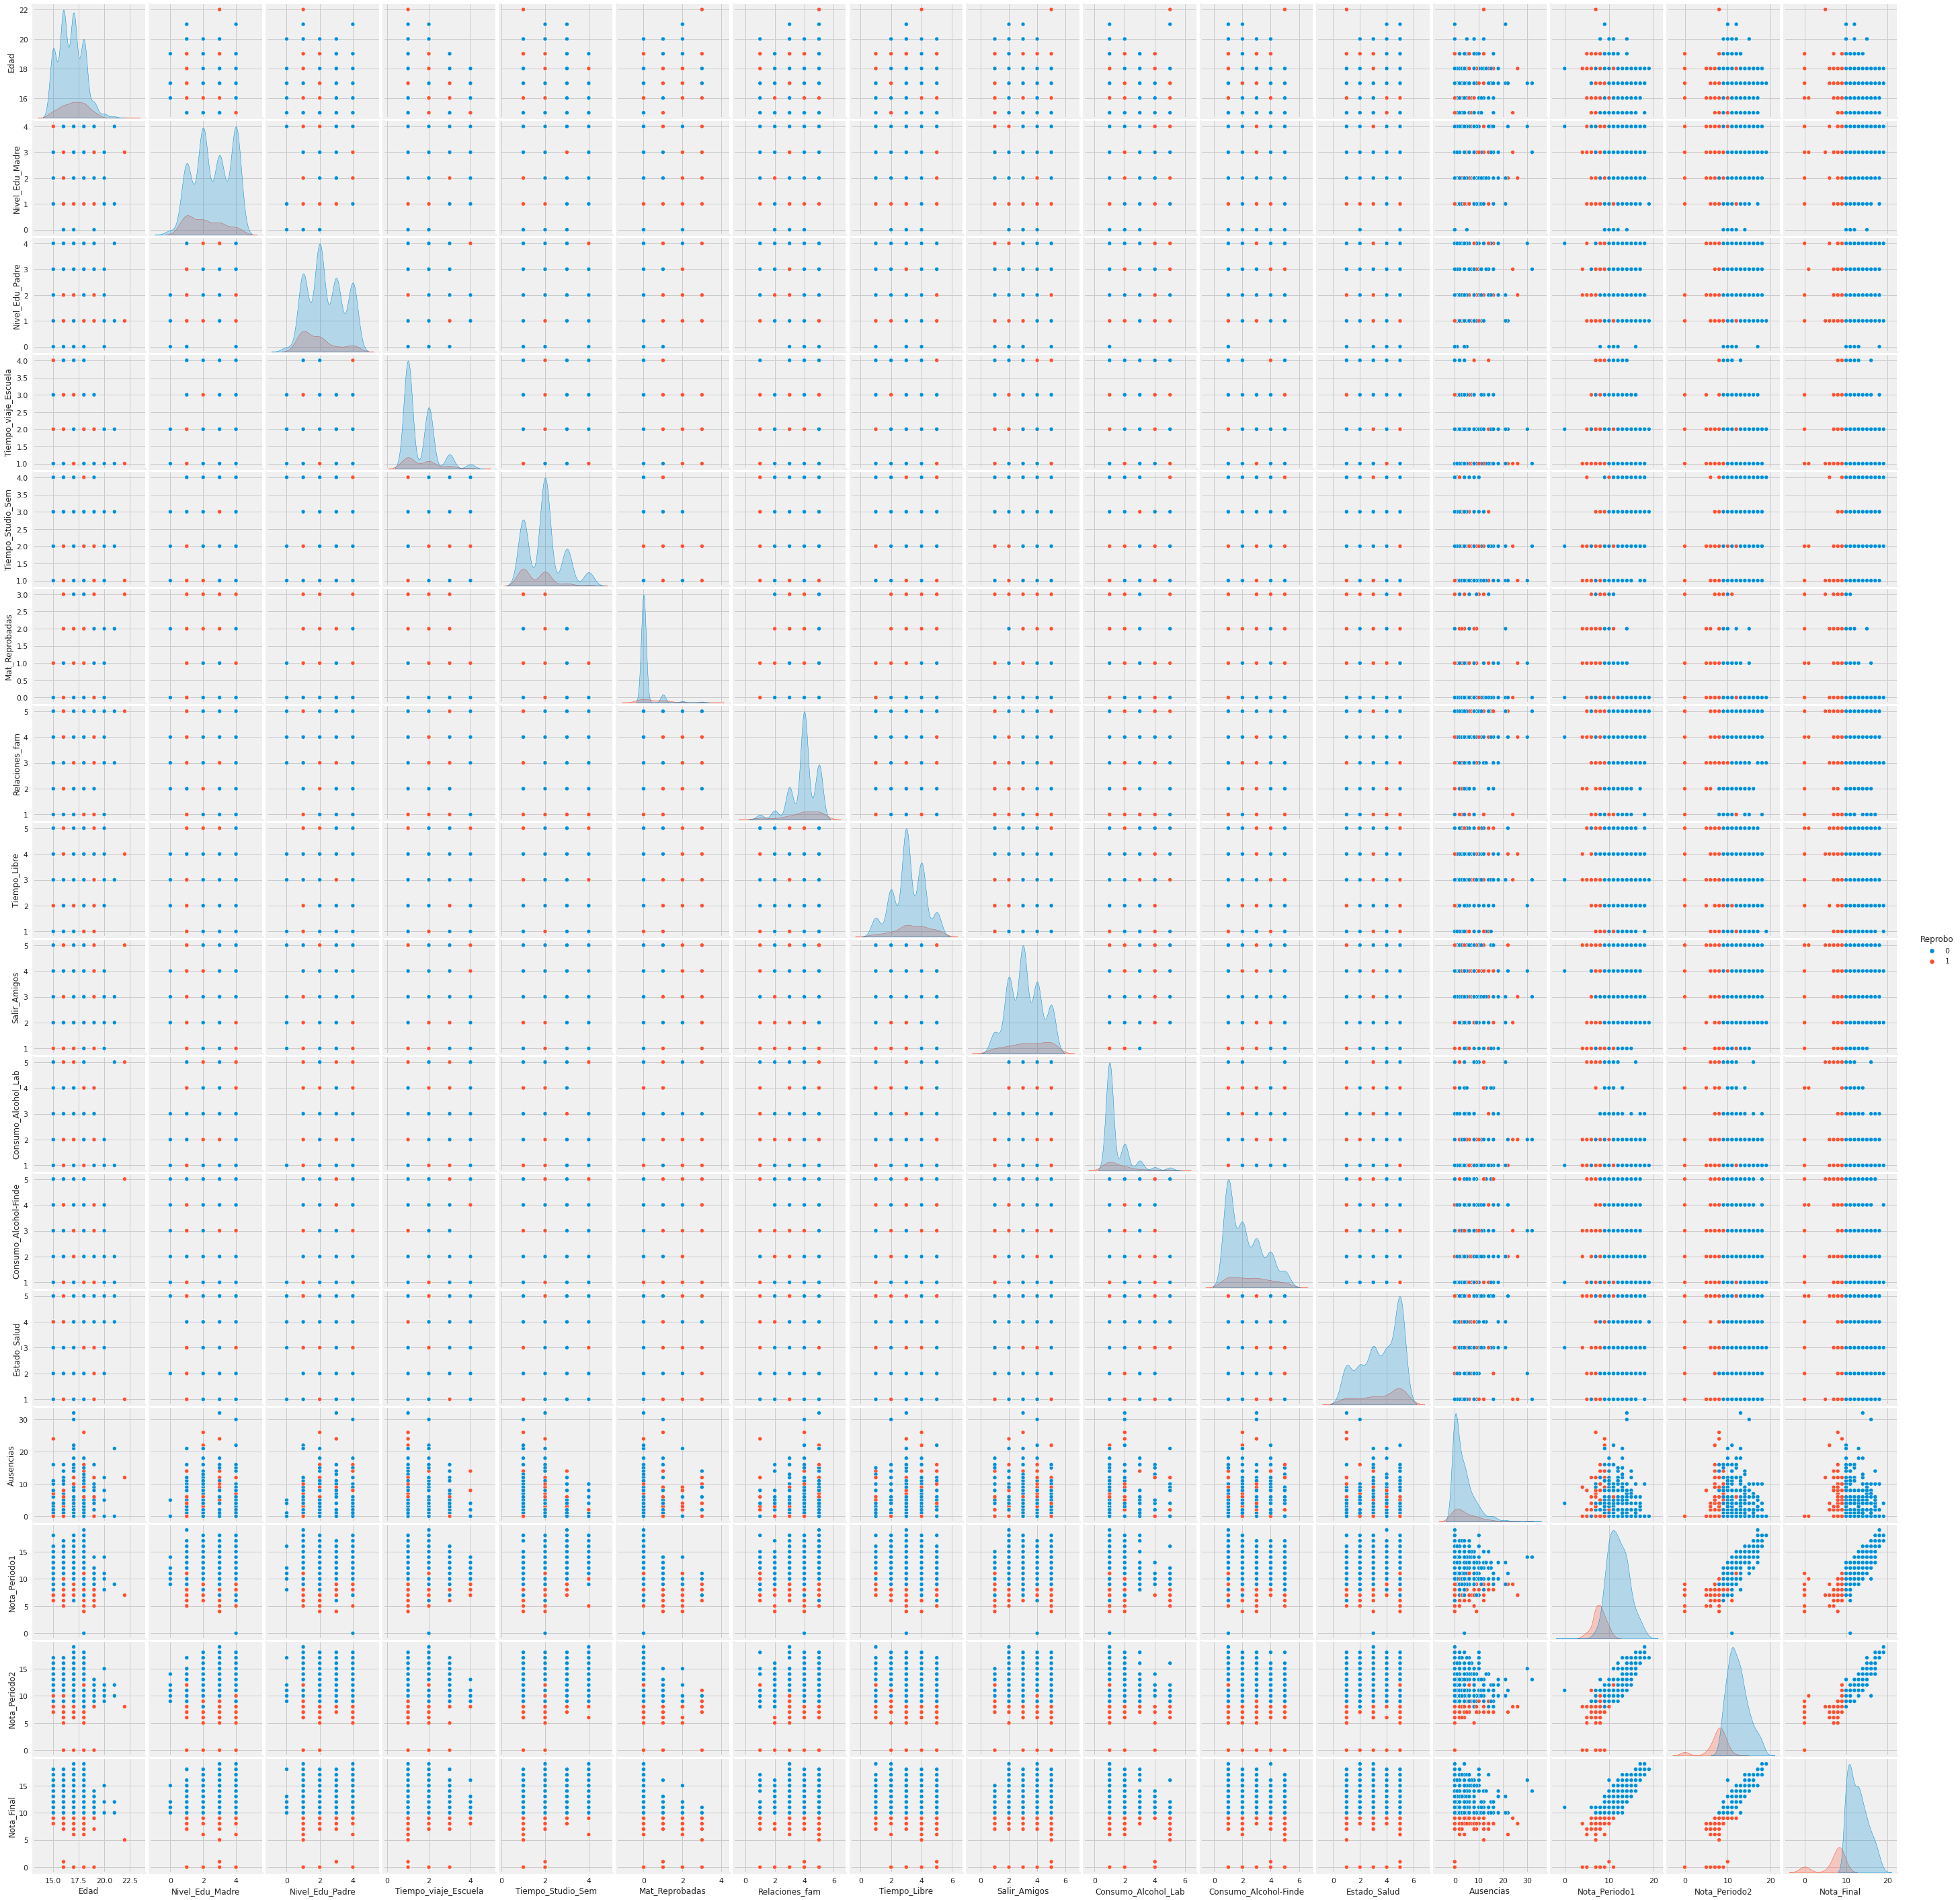

In [ ]:
sns.pairplot(data=df,hue="Reprobo")